In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


## Question 1: [Macro] Average growth of GDP in 2023
## What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [8]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


In [9]:
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [10]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail(10)

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2021-07-01,21483.083,0.047353,0.008144
2021-10-01,21847.602,0.054211,0.016968
2022-01-01,21738.871,0.035651,-0.004977
2022-04-01,21708.160,0.018706,-0.001413
2022-07-01,21851.134,0.017132,0.006586
2022-10-01,21989.981,0.006517,0.006354
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939


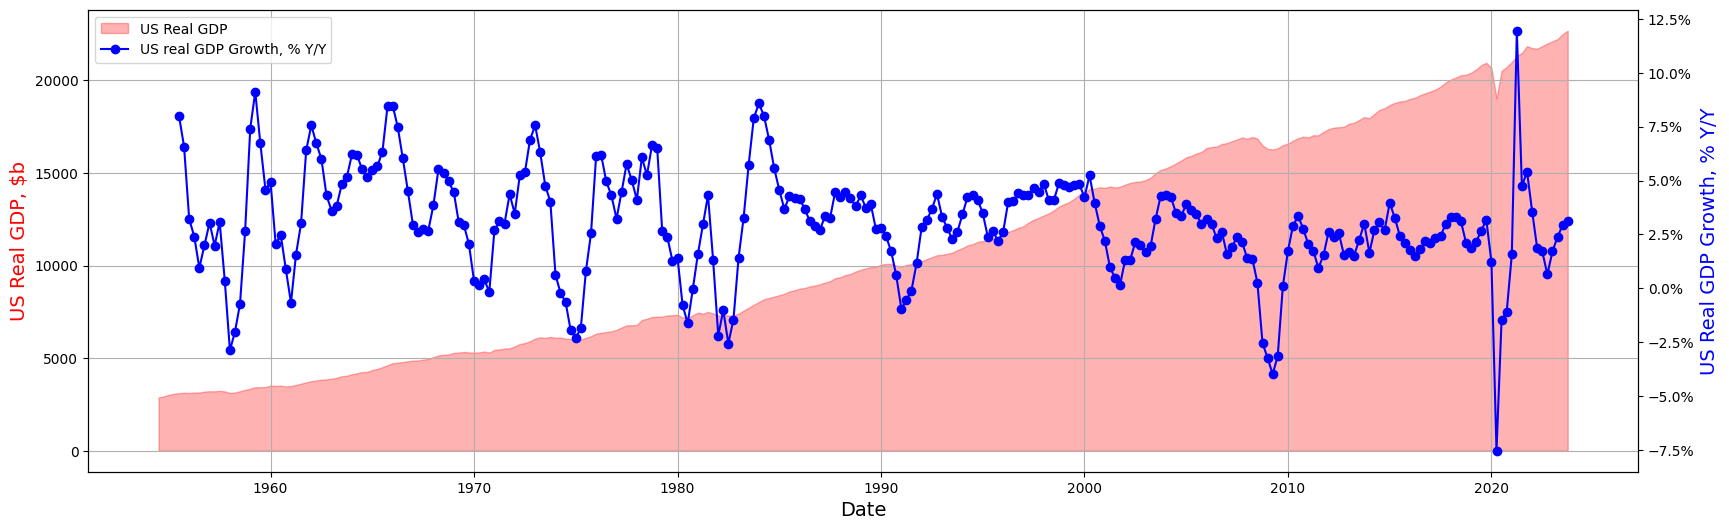

In [11]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US real GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Real GDP")

# Creating a secondary y-axis for US real GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US real GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Real GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Real GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [12]:
import pandas as pd

# Select rows for the year 2023 using .loc
data_2023 = gdpc1.loc['2023-01-01':'2023-10-01']

# Extract the YoY growth values for 2023
yoy_growth_2023 = data_2023['gdpc1_us_yoy'].tolist()
print(yoy_growth_2023)

# Calculate the average YoY growth for 2023
average_yoy_growth_2023 = np.mean(yoy_growth_2023)

# Print the result
print(f"Average YoY growth in 2023: {round(average_yoy_growth_2023*100,1)}")

[0.017179273017444263, 0.023824681594386554, 0.02926886998175937, 0.031344911121114816]
Average YoY growth in 2023: 2.5


## Question 2. [Macro] Inverse "Treasury Yield"

Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [13]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start='2000-01-01')
dgs2.head()

,DGS2
DATE,
2000-01-03,6.38
2000-01-04,6.30
2000-01-05,6.38
2000-01-06,6.35
2000-01-07,6.31


In [14]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start='2000-01-01')
dgs10.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


In [15]:
df_dgs10_dgs2 = pd.merge(dgs2, dgs10, on='DATE', how='inner')
df_dgs10_dgs2

,DGS2,DGS10
DATE,,
2000-01-03,6.38,6.58
2000-01-04,6.30,6.49
2000-01-05,6.38,6.62
2000-01-06,6.35,6.57
2000-01-07,6.31,6.52
...,...,...
2024-04-12,4.88,4.50
2024-04-15,4.93,4.63
2024-04-16,4.97,4.67


In [16]:
df_dgs10_dgs2['dgs10-dgs2'] = df_dgs10_dgs2.DGS10 - df_dgs10_dgs2.DGS2
print(df_dgs10_dgs2)
print(round(min(df_dgs10_dgs2['dgs10-dgs2']), 1))

            DGS2  DGS10  dgs10-dgs2
DATE                               
2000-01-03  6.38   6.58        0.20
2000-01-04  6.30   6.49        0.19
2000-01-05  6.38   6.62        0.24
2000-01-06  6.35   6.57        0.22
2000-01-07  6.31   6.52        0.21
...          ...    ...         ...
2024-04-12  4.88   4.50       -0.38
2024-04-15  4.93   4.63       -0.30
2024-04-16  4.97   4.67       -0.30
2024-04-17  4.93   4.59       -0.34
2024-04-18  4.98   4.64       -0.34

[6339 rows x 3 columns]
-1.1


## Question 3. [Index] Which Index is better recently?

Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [17]:
import yfinance as yf

# Download data for S&P 500 (^GSPC)
sp500_data = yf.download('^GSPC', start='2019-04-09', end='2024-04-10')

# Display the first/last few rows of the data
print(f'\n\n {sp500_data.head()}')
print(f'\n\n {sp500_data.tail()}')

[*********************100%%**********************]  1 of 1 completed



                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-09  2886.580078  2886.879883  2873.330078  2878.199951  2878.199951   
2019-04-10  2881.370117  2889.709961  2879.129883  2888.209961  2888.209961   
2019-04-11  2891.919922  2893.419922  2881.989990  2888.320068  2888.320068   
2019-04-12  2900.860107  2910.540039  2898.370117  2907.409912  2907.409912   
2019-04-15  2908.320068  2909.600098  2896.479980  2905.580078  2905.580078   

                Volume  
Date                    
2019-04-09  3032480000  
2019-04-10  3092230000  
2019-04-11  2970650000  
2019-04-12  3726050000  
2019-04-15  3114530000  


                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-04-03  5194.370117  5228.750000  5194.370117  5211.490234  5211.490234   
2024-04-04  5244.049805  525

In [18]:
sp500_data.loc['2024-04-09', 'Adj Close']

5209.91015625

In [19]:
sp500_data.loc['2019-04-09', 'Adj Close']

2878.199951171875

In [20]:
5209.91015625/2878.199951171875

1.8101279426847174

In [21]:
sp500_growth = ((sp500_data.loc['2024-04-09', 'Adj Close']/sp500_data.loc['2019-04-09', 'Adj Close'])-1)*100
sp500_growth

81.01279426847174

In [23]:
import yfinance as yf

# Download data for  IPC Mexico (^MXX)
IPC_Mexico_data = yf.download('^MXX', start='2019-04-09', end='2024-04-10')


# Display the first/last few rows of the data
print(f'\n\n {IPC_Mexico_data.head()}')
print(f'\n\n {IPC_Mexico_data.tail()}')


[*********************100%%**********************]  1 of 1 completed



                     Open          High           Low         Close  \
Date                                                                 
2019-04-09  45346.828125  45346.828125  44854.531250  45151.628906   
2019-04-10  45204.750000  45219.410156  44850.109375  44909.140625   
2019-04-11  44872.531250  44966.500000  44373.488281  44580.058594   
2019-04-12  44767.671875  44888.699219  44534.378906  44686.058594   
2019-04-15  44649.738281  44900.929688  44347.531250  44625.781250   

               Adj Close     Volume  
Date                                 
2019-04-09  45151.628906  191575000  
2019-04-10  44909.140625  145314900  
2019-04-11  44580.058594  109090000  
2019-04-12  44686.058594  143662400  
2019-04-15  44625.781250  108627100  


                     Open          High           Low         Close  \
Date                                                                 
2024-04-03  57547.191406  58086.421875  57300.109375  57503.390625   
2024-04-04  57539.468750  5

In [24]:
IPC_Mexico_growth = ((IPC_Mexico_data.loc['2024-04-09', 'Adj Close']/IPC_Mexico_data.loc['2019-04-09', 'Adj Close']) -1)*100
IPC_Mexico_growth

27.506249125667438

## Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [25]:
import yfinance as yf

def percentage_change():

  tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

  for ticker in tickers:
    data = yf.download(ticker, start='2023-01-01', end='2023-12-31')
    adj_close_max = max(data['Adj Close'])
    adj_close_min = min(data['Adj Close'])
    percentage_change = round((adj_close_max - adj_close_min) / adj_close_max, 2)
    print(f'\n percentage change for {ticker} : {percentage_change}\n')

percentage_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



 percentage change for 2222.SR : 0.21


 percentage change for BRK-B : 0.21



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



 percentage change for AAPL : 0.37


 percentage change for MSFT : 0.42



[*********************100%%**********************]  1 of 1 completed



 percentage change for GOOG : 0.39



[*********************100%%**********************]  1 of 1 completed


 percentage change for JPM : 0.28



## Question 5. [Stocks] Dividend Yield

Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [27]:
import yfinance as yf

def dividend_yield():

  tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

  for ticker in tickers:

    data= yf.download(ticker, start='2023-01-01', end='2023-12-31')

    # Print the Adj close price for the last trading day of 2023
    last_adj_price_2023 = data.loc[data.index[-1], 'Adj Close']

    # Get dividends for the year 2023
    ticker_obj = yf.Ticker(ticker)
    dividends_2023 = ticker_obj.dividends.loc['2023']

    # Print dividends yiled % in 2023
    dividend_yield_percent = round(dividends_2023.sum() *100/last_adj_price_2023, 1)

    print(f"\nThe dividend yield percent of {ticker} for 2023: {dividend_yield_percent}\n")

dividend_yield()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



The dividend yield percent of 2222.SR for 2023: 2.8



[*********************100%%**********************]  1 of 1 completed


The dividend yield percent of BRK-B for 2023: 0.0




[*********************100%%**********************]  1 of 1 completed


The dividend yield percent of AAPL for 2023: 0.5




[*********************100%%**********************]  1 of 1 completed


The dividend yield percent of MSFT for 2023: 0.7




[*********************100%%**********************]  1 of 1 completed


The dividend yield percent of GOOG for 2023: 0.0




The dividend yield percent of JPM for 2023: 2.4



## Question 6. [Exploratory] Investigate new metrics
Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

## Answer:

The price/earnings to growth (PEG) ratio is a valuation metric that evaluates the price of a stock relative to its earnings growth rate.

PEG Ratio < 1: Generally considered undervalued. The stock's earnings growth rate exceeds its current price.

PEG Ratio ≈ 1: Indicates that the stock is fairly valued. The price is in line with the expected earnings growth.

PEG Ratio > 1: Suggests overvaluation. The stock's earnings growth rate does not justify its current price.

As a long term investor, the current PEG ratio of a stock can help us decide whether to buy a particular stock. For example, MSFT has very high PEG (2.44)indicating not to buy this stock as its growth potential or liklihood of becoming a multibagger is very limited.

Likewise we can check 'debtToEquity' ratio which alerts us about its liability. A high 'debtToEquity' clearly depicts that the company is under high debt and it can impact its profit in case of high interest rate.

Best on such key metrics we can use ML algorithm to cluster the stocks into 5-6 groups and then can take call on investing after additional analysis such as DCF and qualitative analysis.

##### Key Metrics scrapping from yfinance

In [ ]:
microsoft = yf.Ticker('MSFT')
dict =  microsoft.info

print(dict) # We can find many key metrics for a particular stock from this dictionary.
print(f"\n The PEG ratio for 'MSFT' is : {dict['pegRatio']}")

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

## Question 7. [Exploratory] Time-driven strategy description around earnings releases

Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

Key strategies that can be formulated based on the past earning and futuristic earning :

1) We can select companies that exhibited strong earnings per share (EPS) last quarter and monitor their expected future EPS and trading volumes for potential swing trading opportunities.

2) If we have already invested in a company that reported strong earnings per share (EPS) last quarter and is projected to deliver robust EPS in the upcoming quarter, it may be advisable to maintain the investment. However, this decision should be continuously supported by thorough fundamental analysis and consideration of both microeconomic and macroeconomic factors.